In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import re
import us
from rapidfuzz import fuzz, process

Data source: U.S. Department of Labor, Performance Data – Office of Foreign Labor Certification (OFLC).   
https://www.dol.gov/agencies/eta/foreign-labor/performance. 

Merged quarterly U.S. visa datasets using pandas, removed duplicates, and exported a clean file for Tableau analysis.

In [2]:
files = [
    "LCA_Disclosure_Data_FY2023_Q4.xlsx",
    "LCA_Disclosure_Data_FY2024_Q1.xlsx",
    "LCA_Disclosure_Data_FY2024_Q2.xlsx",
    "LCA_Disclosure_Data_FY2024_Q3.xlsx",
    "LCA_Disclosure_Data_FY2024_Q4.xlsx",
]

# Read and combine
combined = pd.concat(
    [pd.read_excel(file).assign(SourceFile=file) for file in files],
    ignore_index=True
)

# Drop duplicates and reset index
combined.drop_duplicates(inplace=True)
combined.reset_index(drop=True, inplace=True)

# Export csv file
combined.to_csv("LCA_Disclosure_Combined.csv", index=False)

In [3]:
df = pd.read_csv("LCA_Disclosure_Combined.csv")
df.shape[0] 

688976

In [4]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL,SourceFile,EMPLOYER_FEIN
0,I-200-23244-317261,Certified - Withdrawn,2023-09-01,2023-09-30,2023-09-11,H-1B,"Analyst, Business Sr",15-2031.00,Operations Research Analysts,Y,...,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,LCA_Disclosure_Data_FY2023_Q4.xlsx,NaN
1,I-202-23242-306442,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B1 Singapore,Board Certified Behavior Analyst,19-3034.00,School Psychologists,Y,...,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,LCA_Disclosure_Data_FY2023_Q4.xlsx,NaN
2,I-200-23242-308144,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B,Manager - Software Engineering,15-1252.00,Software Developers,Y,...,"$60,000 or higher annual wage",NaN,Disclose Business,Sheppard,Kaitlyn (11606.425.22),NaN,Berry Appleman & Leiden LLP,ksheppard@bal.com,LCA_Disclosure_Data_FY2023_Q4.xlsx,NaN
3,I-200-23172-131625,Certified - Withdrawn,2023-06-21,2023-09-30,2023-06-28,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,LCA_Disclosure_Data_FY2023_Q4.xlsx,NaN
4,I-200-23170-125146,Certified - Withdrawn,2023-06-19,2023-09-30,2023-06-26,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,LCA_Disclosure_Data_FY2023_Q4.xlsx,NaN


In [5]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS1',
       'EMPLOYER_POC_ADDRESS2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_POC

In [6]:
columns_to_keep = [
    'CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'ORIGINAL_CERT_DATE',
    'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE', 'SOC_TITLE', 'FULL_TIME_POSITION',
    'BEGIN_DATE', 'END_DATE', 'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT',
    'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
    'CHANGE_EMPLOYER', 'AMENDED_PETITION',
    'EMPLOYER_ADDRESS1', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
    'EMPLOYER_COUNTRY',
    'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
    'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
    'EMPLOYER_FEIN'
]

df = df[columns_to_keep]
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_OTHER_SOURCE
0,I-200-23244-317261,Certified - Withdrawn,2023-09-01,2023-09-30,2023-09-11,H-1B,"Analyst, Business Sr",15-2031.00,Operations Research Analysts,Y,...,FL,33431,UNITED STATES OF AMERICA,96720.0,136411.0,Year,96720.0,Year,II,NaN
1,I-202-23242-306442,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B1 Singapore,Board Certified Behavior Analyst,19-3034.00,School Psychologists,Y,...,CA,94566,UNITED STATES OF AMERICA,68182.0,NaN,Year,68182.0,Year,I,NaN
2,I-200-23242-308144,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B,Manager - Software Engineering,15-1252.00,Software Developers,Y,...,IL,60606,UNITED STATES OF AMERICA,131533.0,NaN,Year,111821.0,Year,III,NaN
3,I-200-23172-131625,Certified - Withdrawn,2023-06-21,2023-09-30,2023-06-28,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,GA,30076-5648,UNITED STATES OF AMERICA,80150.0,80200.0,Year,80101.0,Year,I,NaN
4,I-200-23170-125146,Certified - Withdrawn,2023-06-19,2023-09-30,2023-06-26,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,TX,30076-5648,UNITED STATES OF AMERICA,99100.0,99200.0,Year,99008.0,Year,II,NaN


In [7]:
df.isna().sum()

CASE_NUMBER                        0
CASE_STATUS                        0
RECEIVED_DATE                      0
DECISION_DATE                      0
ORIGINAL_CERT_DATE            647042
VISA_CLASS                         0
JOB_TITLE                          0
SOC_CODE                           0
SOC_TITLE                          0
FULL_TIME_POSITION                 0
BEGIN_DATE                         0
END_DATE                           0
TOTAL_WORKER_POSITIONS             0
NEW_EMPLOYMENT                     0
CONTINUED_EMPLOYMENT               0
CHANGE_PREVIOUS_EMPLOYMENT         0
NEW_CONCURRENT_EMPLOYMENT          0
CHANGE_EMPLOYER                    0
AMENDED_PETITION                   0
EMPLOYER_NAME                      0
EMPLOYER_ADDRESS1                  0
EMPLOYER_CITY                      0
EMPLOYER_STATE                   169
EMPLOYER_POSTAL_CODE               0
EMPLOYER_COUNTRY                   0
WAGE_RATE_OF_PAY_FROM              0
WAGE_RATE_OF_PAY_TO           466861
W

#### **CASE STATUS**

In [8]:
# Check CASE_STATUS 
df['CASE_STATUS'].value_counts()

CASE_STATUS
Certified                630745
Certified - Withdrawn     41934
Withdrawn                 11296
Denied                     5001
Name: count, dtype: int64

#### **Dates**

In [9]:
# Clean and standardize date columns, considering US data format
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'], format='%Y-%m-%d', errors='coerce')
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'], format='%Y-%m-%d', errors='coerce')

In [10]:
df['RECEIVED_DATE'].isna().sum()

0

In [11]:
df['DECISION_DATE'].isna().sum()

0

In [12]:
# Need to ensure DECISION_DATE later than RECEIVED_DATE
invalid_date_rows = df[df['RECEIVED_DATE'] > df['DECISION_DATE']]
invalid_date_rows[['RECEIVED_DATE', 'DECISION_DATE']]

,RECEIVED_DATE,DECISION_DATE


In [13]:
# Clean ORIGINAL_CERT_DATE
df['ORIGINAL_CERT_DATE'] = pd.to_datetime(df['ORIGINAL_CERT_DATE'], format='%Y-%m-%d', errors='coerce')

In [14]:
invalid_cert_rows = df[
    (df['ORIGINAL_CERT_DATE'] < df['RECEIVED_DATE']) |
    (df['ORIGINAL_CERT_DATE'] > df['DECISION_DATE'])
]

invalid_date_rows[['RECEIVED_DATE', 'DECISION_DATE', 'ORIGINAL_CERT_DATE']]

,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE


#### **VISA CLASS** 

In [15]:
# Check VISA_CLASS  
df['VISA_CLASS'].value_counts()

VISA_CLASS
H-1B               671183
E-3 Australian      13066
H-1B1 Chile          2851
H-1B1 Singapore      1876
Name: count, dtype: int64

#### **SOC_CODE and SOC_TITLE**

In [16]:
# Normalize SOC_TITLE with proper capitalisation
df['SOC_TITLE'] = df['SOC_TITLE'].str.title().str.strip()

In [17]:
df['SOC_TITLE'].value_counts().head()

SOC_TITLE
Software Developers                                213068
Computer Systems Engineers/Architects               42579
Information Technology Project Managers             24478
Computer Systems Analysts                           23753
Software Quality Assurance Analysts And Testers     21520
Name: count, dtype: int64

In [18]:
# Only add '.00' if it's missing
df['SOC_CODE'] = df['SOC_CODE'].astype(str).str.strip()
df['SOC_CODE'] = df['SOC_CODE'].apply(lambda x: x if '.' in x else x + '.00')

In [19]:
# Check SOC_TITLE consistency
df.groupby('SOC_CODE')['SOC_TITLE'].nunique().loc[lambda x: x > 1]

SOC_CODE
11-1011.00     2
11-1021.00     3
11-2021.00     2
11-2022.00     2
11-3021.00    10
              ..
41-3031.00     2
41-4011.00     2
41-4012.00     2
41-9031.00     2
53-2011.00     2
Name: SOC_TITLE, Length: 170, dtype: int64

In [20]:
# Take the most frequent SOC title names
preferred_titles = (
    df.groupby(['SOC_CODE', 'SOC_TITLE'])
      .size()
      .reset_index(name='count')
      .sort_values(['SOC_CODE', 'count'], ascending=[True, False])
      .drop_duplicates('SOC_CODE')
      .set_index('SOC_CODE')['SOC_TITLE']
)

df['SOC_TITLE'] = df['SOC_CODE'].map(preferred_titles)

In [21]:
df.groupby('SOC_CODE')['SOC_TITLE'].nunique().loc[lambda x: x > 1]

Series([], Name: SOC_TITLE, dtype: int64)

#### **EMPLOYER NAME**

In [22]:
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.strip().str.upper()

In [23]:
df['EMPLOYER_NAME'].value_counts().head(10)

EMPLOYER_NAME
AMAZON.COM SERVICES LLC                   17099
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    14712
ERNST & YOUNG U.S. LLP                    11523
MICROSOFT CORPORATION                     11404
TATA CONSULTANCY SERVICES LIMITED         11203
GOOGLE LLC                                10583
INFOSYS LIMITED                            7947
HCL AMERICA INC                            4896
WAL-MART ASSOCIATES, INC.                  4840
APPLE INC.                                 4724
Name: count, dtype: int64

#### **Geography**

In [24]:
df['EMPLOYER_COUNTRY'].value_counts()

EMPLOYER_COUNTRY
UNITED STATES OF AMERICA    688807
GEORGIA                         92
AUSTRALIA                       35
INDIA                           21
UNITED KINGDOM                   4
CANADA                           3
ANGOLA                           3
ALBANIA                          2
ISRAEL                           1
UNITED ARAB EMIRATES             1
CHINA                            1
BARBADOS                         1
MEXICO                           1
BELGIUM                          1
CHILE                            1
AFGHANISTAN                      1
NAMIBIA                          1
Name: count, dtype: int64

In [25]:
# Only concider US locations
df = df[df['EMPLOYER_COUNTRY'] == 'UNITED STATES OF AMERICA'] 

In [26]:
df['EMPLOYER_POSTAL_CODE'].value_counts().tail(10)

EMPLOYER_POSTAL_CODE
30228         1
02842         1
760405073     1
47660         1
45211         1
07843         1
27836         1
06115         1
33598         1
80210-1503    1
Name: count, dtype: int64

In [27]:
def clean_zip(zipcode):
    if pd.isna(zipcode):
        return None
    zipcode = str(zipcode).strip()
    
    # Extract the first 5 digits only (handles 9-digit ZIPs like 12345-6789)
    match = re.match(r'^(\d{5})', zipcode)
    if match:
        return match.group(1)
    return None  # If it's not a valid ZIP, set as None

df['EMPLOYER_POSTAL_CODE'] = df['EMPLOYER_POSTAL_CODE'].apply(clean_zip)

In [28]:
df['EMPLOYER_CITY'] = df['EMPLOYER_CITY'].str.title().str.strip()

In [29]:
df['EMPLOYER_CITY'].value_counts().head(10)

EMPLOYER_CITY
New York           39321
Seattle            24972
Chicago            21208
Santa Clara        18857
San Francisco      16652
College Station    15374
Mountain View      13811
Redmond            12688
San Jose           12664
Rockville          12086
Name: count, dtype: int64

In [30]:
# Find cities with any digit in them
cities_with_numbers = df[df['EMPLOYER_CITY'].str.contains(r'\d', na=False)]

# Preview the results
cities_with_numbers['EMPLOYER_CITY'].value_counts().head(10)

EMPLOYER_CITY
78758                       32
Charlotte, Nc, 28262        10
27601                        6
8816                         3
Worcester, Ma 01605          3
Pittsburgh, Pa 15212         3
Ste. 201                     3
48104                        2
San Ramon, Ca 94583-1323     2
Suite 104                    2
Name: count, dtype: int64

In [31]:
zip_to_city = (
    df[df['EMPLOYER_CITY'].str.match(r'^[a-zA-Z\s\-]+$', na=False)]  
    .groupby('EMPLOYER_POSTAL_CODE')['EMPLOYER_CITY']
    .agg(lambda x: x.value_counts().idxmax())
)

def clean_employer_city(row):
    city = str(row['EMPLOYER_CITY']).strip()
    
    # If it's a ZIP code only
    if re.fullmatch(r'\d{5}', city):
        return zip_to_city.get(city, None)
    
    # If it contains ZIP at the end (e.g. "Charlotte, NC, 28262")
    zip_match = re.search(r'(\d{5})(-\d{4})?$', city)
    if zip_match:
        zip_code = zip_match.group(1)
        return zip_to_city.get(zip_code, None)
    
    # If it starts with a number (address or suite)
    if re.match(r'^\d+', city) or 'suite' in city.lower() or 'ste' in city.lower():
        return zip_to_city.get(row['EMPLOYER_POSTAL_CODE'], None)
    
    # If contains number (like Arcadia626 or Cupertino C#7020523)
    if re.search(r'\d', city):
        return zip_to_city.get(row['EMPLOYER_POSTAL_CODE'], None)

    return city  # Keep original if it looks clean

In [32]:
df['EMPLOYER_CITY'] = df.apply(clean_employer_city, axis=1)

In [33]:
cities_with_numbers = df[df['EMPLOYER_CITY'].str.contains(r'\d', na=False)]
cities_with_numbers['EMPLOYER_CITY'].value_counts()

Series([], Name: count, dtype: int64)

In [36]:
# Cities that look real
clean_city_list = df['EMPLOYER_CITY'].value_counts()
clean_city_list = clean_city_list[clean_city_list > 10]  # at least 10 times
clean_city_list = clean_city_list[~clean_city_list.index.str.contains(r'\d')]

In [37]:
# Find low-frequency or messy cities
all_cities = df['EMPLOYER_CITY'].dropna().unique()
suspicious_cities = [c for c in all_cities if c not in clean_city_list.index]

# Create correction map
city_correction_map = {}

for city in suspicious_cities:
    match, score, _ = process.extractOne(city, clean_city_list.index, scorer=fuzz.ratio)
    if score >= 85:
        city_correction_map[city] = match

In [38]:
df['EMPLOYER_CITY'] = df['EMPLOYER_CITY'].replace(city_correction_map)

In [39]:
df['EMPLOYER_CITY'].value_counts()

EMPLOYER_CITY
New York          39328
Seattle           24972
Chicago           21208
Santa Clara       18857
San Francisco     16670
                  ...  
Stanton               1
Wellsboro             1
East Palo Alto        1
Sugar Loaf            1
Daniel Island         1
Name: count, Length: 4988, dtype: int64

In [40]:
df = df[df['EMPLOYER_STATE'] != 'FM']

In [41]:
df['EMPLOYER_STATE'].value_counts().head(10)

EMPLOYER_STATE
CA    134530
TX     85812
NJ     64718
NY     51772
WA     42612
IL     35125
MA     26865
PA     22183
VA     21858
MI     20721
Name: count, dtype: int64

In [42]:
# Show all unique values that don't match 2 uppercase letters
invalid_states = df[~df['EMPLOYER_STATE'].str.fullmatch(r'[A-Z]{2}', na=False)]['EMPLOYER_STATE'].value_counts()
invalid_states

Series([], Name: count, dtype: int64)

In [43]:
df['EMPLOYER_STATE'].isna().sum()

0

In [44]:
# Create mapping: abbreviation → full name
abbrev_to_full = {state.abbr: state.name for state in us.states.STATES_AND_TERRITORIES}

# Apply to your DataFrame
df['EMPLOYER_STATE'] = df['EMPLOYER_STATE'].map(abbrev_to_full)

In [45]:
df['EMPLOYER_STATE'].value_counts().head(10)

EMPLOYER_STATE
California       134530
Texas             85812
New Jersey        64718
New York          51772
Washington        42612
Illinois          35125
Massachusetts     26865
Pennsylvania      22183
Virginia          21858
Michigan          20721
Name: count, dtype: int64

#### **Wage**

In [46]:
df['WAGE_UNIT_OF_PAY'].value_counts()

WAGE_UNIT_OF_PAY
Year         642775
Hour          43526
Month          1388
Week            680
Bi-Weekly       436
Name: count, dtype: int64

In [47]:
df['PW_UNIT_OF_PAY'].value_counts()

PW_UNIT_OF_PAY
Year         645149
Hour          42603
Month           795
Bi-Weekly       134
Week            124
Name: count, dtype: int64

In [48]:
unit_order = ['Hour', 'Week', 'Bi-Weekly', 'Month', 'Year']

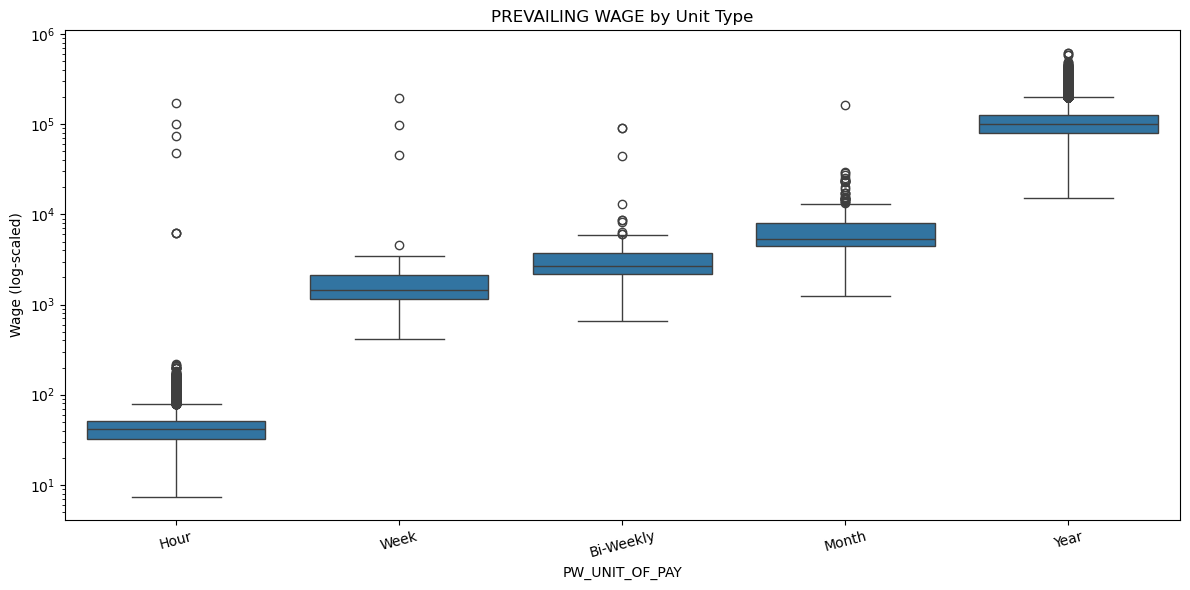

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PW_UNIT_OF_PAY', y='PREVAILING_WAGE', order=unit_order)
plt.yscale('log') 
plt.title('PREVAILING WAGE by Unit Type')
plt.ylabel('Wage (log-scaled)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [50]:
df['PW_OUTLIER_RULE'] = (
    ((df['PW_UNIT_OF_PAY'] == 'Hour') & (df['PREVAILING_WAGE'] > 1_000)) |
    ((df['PW_UNIT_OF_PAY'] == 'Week') & (df['PREVAILING_WAGE'] > 20_000)) |
    ((df['PW_UNIT_OF_PAY'] == 'Bi-Weekly') & (df['PREVAILING_WAGE'] > 40_000)) |
    ((df['PW_UNIT_OF_PAY'] == 'Month') & (df['PREVAILING_WAGE'] > 50_000)) |
    ((df['PW_UNIT_OF_PAY'] == 'Year') & (df['PREVAILING_WAGE'] > 1_000_000))
)

# Step 2: Convert suspected outliers to annual wage (assuming misreported units)
df.loc[(df['PW_UNIT_OF_PAY'] == 'Hour') & df['PW_OUTLIER_RULE'], 'PREVAILING_WAGE'] *= 2080  # 40 hrs/week * 52 weeks
df.loc[(df['PW_UNIT_OF_PAY'] == 'Week') & df['PW_OUTLIER_RULE'], 'PREVAILING_WAGE'] *= 52
df.loc[(df['PW_UNIT_OF_PAY'] == 'Bi-Weekly') & df['PW_OUTLIER_RULE'], 'PREVAILING_WAGE'] *= 26
df.loc[(df['PW_UNIT_OF_PAY'] == 'Month') & df['PW_OUTLIER_RULE'], 'PREVAILING_WAGE'] *= 12

In [51]:
df.loc[df['PW_OUTLIER_RULE'], 'PW_UNIT_OF_PAY'] = 'Year'

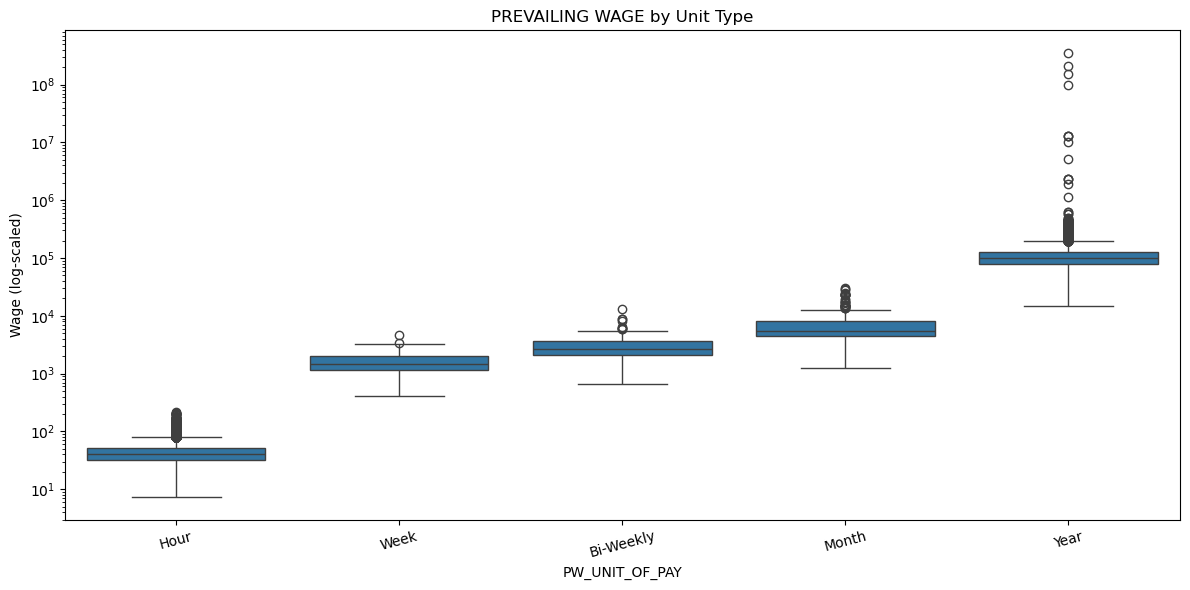

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PW_UNIT_OF_PAY', y='PREVAILING_WAGE', order=unit_order)
plt.yscale('log') 
plt.title('PREVAILING WAGE by Unit Type')
plt.ylabel('Wage (log-scaled)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [53]:
high_yearly = df[
    (df['PW_UNIT_OF_PAY'] == 'Year') &
    (df['PREVAILING_WAGE'] > 1_000_000)
]

high_yearly[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']].sort_values(by='PREVAILING_WAGE', ascending=False)

,JOB_TITLE,EMPLOYER_NAME,PREVAILING_WAGE
210526,Tools & Automation Engineer,APPLE INC.,358639840.0
205555,Senior Systems Engineer,"AMERICAN HONDA MOTOR CO., INC.",207638080.0
75772,Postdoctoral Scholar,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",155103520.0
535837,Spanish Dual Immersion Teacher,WASHINGTON COUNTY SCHOOL DISTRICT,99001760.0
18369,Attending Physician/Psychiatrist,"PHYSICIAN AFFILIATE GROUP OF NY, PC",12854816.0
28345,Attending Physician/Psychiatrist,"PHYSICIAN AFFILIATE GROUP OF NY, PC",12854816.0
637714,Attending Physician/Psychiatrist,"PHYSICIAN AFFILIATE GROUP OF NY, PC",12854816.0
673017,Senior Software Engineer,"PROSPER MARKETPLACE, INC.",10069956.0
215859,Lead Color Assist,"THE HARBOR PICTURE COMPANY, INC.",5139212.0
212416,Senior Systems Engineer,"MEDIDATA SOLUTIONS, INC.",2363660.0


In [54]:
df['YEARLY_WAGE_SUSPECT'] = (
    (df['PW_UNIT_OF_PAY'] == 'Year') & 
    (df['PREVAILING_WAGE'] > 1_000_000)
)

median_by_job = df[
    (df['PW_UNIT_OF_PAY'] == 'Year') & 
    (df['PREVAILING_WAGE'] <= 1_000_000)
].groupby('SOC_CODE')['PREVAILING_WAGE'].median()

df.loc[df['YEARLY_WAGE_SUSPECT'], 'PREVAILING_WAGE'] = df.loc[
    df['YEARLY_WAGE_SUSPECT'], 'SOC_CODE'
].map(median_by_job)

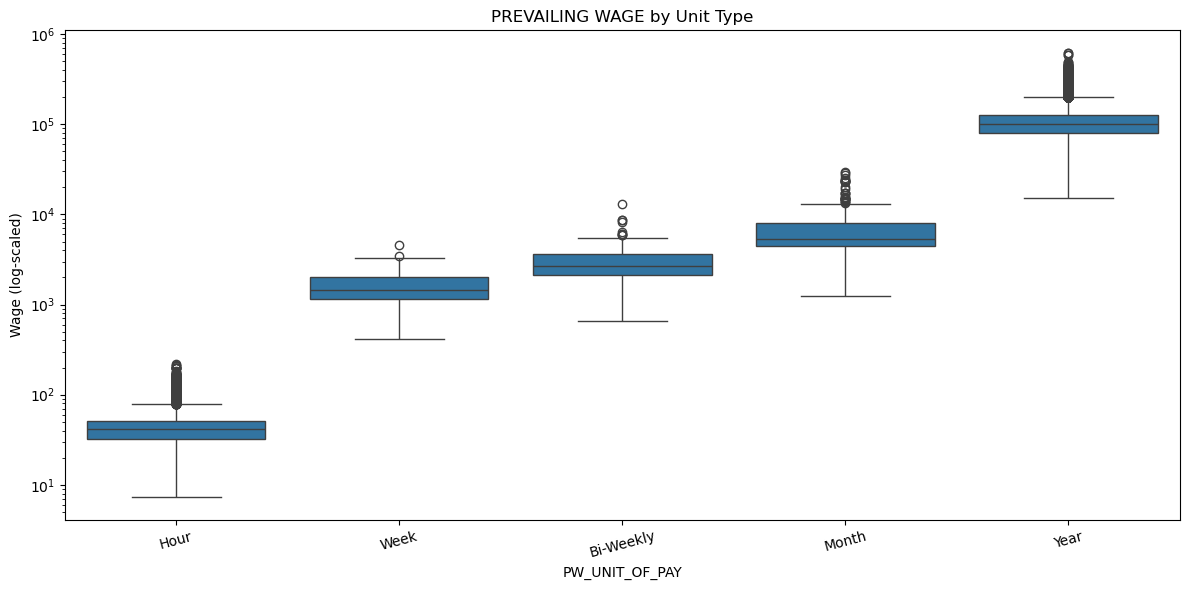

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PW_UNIT_OF_PAY', y='PREVAILING_WAGE', order=unit_order)
plt.yscale('log') 
plt.title('PREVAILING WAGE by Unit Type')
plt.ylabel('Wage (log-scaled)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [56]:
# Conversion dictionary
unit_to_year = {
    'Hour': 2080,
    'Week': 52,
    'Bi-Weekly': 26,
    'Month': 12,
    'Year': 1
}

# Define the unified function that does all steps together
def normalize_and_reduce(row):
    wu = row['WAGE_UNIT_OF_PAY']
    pu = row['PW_UNIT_OF_PAY']
    wage = row['WAGE_RATE_OF_PAY_FROM']
    threshold = 5 * row['PREVAILING_WAGE']

    # Step 1: convert if unit mismatch
    if wu in unit_to_year and pu in unit_to_year and wu != pu:
        yearly = wage * unit_to_year[wu]
        wage = yearly / unit_to_year[pu]
        wu = pu  # update unit to match

    # Step 2: reduce if too high
    while wage > threshold:
        wage /= 10

    return pd.Series([wage, wu])

In [57]:
df[['WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY']] = df.apply(normalize_and_reduce, axis=1)

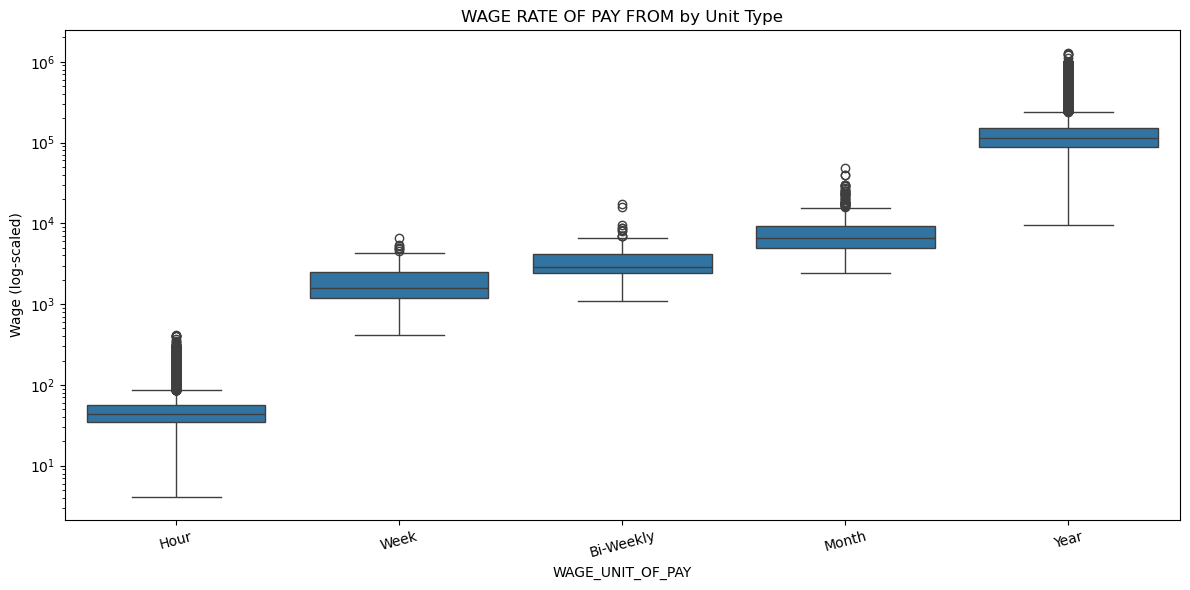

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='WAGE_UNIT_OF_PAY', y='WAGE_RATE_OF_PAY_FROM', order=unit_order)
plt.yscale('log')  # optional: log scale to compress outliers
plt.title('WAGE RATE OF PAY FROM by Unit Type')
plt.ylabel('Wage (log-scaled)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [59]:
mismatch_count = (df['WAGE_UNIT_OF_PAY'] != df['PW_UNIT_OF_PAY']).sum()
print("Mismatched unit rows:", mismatch_count)

Mismatched unit rows: 0


In [60]:
df['PW_WAGE_LEVEL'].value_counts()

PW_WAGE_LEVEL
II     278670
III    132146
I      126715
IV      99457
Name: count, dtype: int64

In [61]:
df['PW_OTHER_SOURCE'].value_counts()

PW_OTHER_SOURCE
Survey    38647
CBA        8393
DBA          77
SCA          76
Name: count, dtype: int64

In [65]:
df.drop(columns=["PW_OUTLIER_RULE", "YEARLY_WAGE_SUSPECT"], inplace=True)

In [66]:
df.to_csv("LCA_Disclosure_Cleaned.csv", index=False)